**Dataset**

GTZAN dataset, a collection of 10 genres with 100 audio files each, all having a length of 30 seconds.

<br>

**Purpose:**

1.   We want to understand what is an Audio file. What features we can visualize on this kind of data.
2.   Exploratory Data Analysis (EDA) done using librosa 
3.   Genres Classification on the 30 seconds CSV file (trying multiple models and identify which has the best accuracy)

<br>

**Application:**

A recommender system: given a song, give me top X songs most similar.





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Making data frame from the csv file
df = pd.read_csv('data.csv')

# Print top five rows of the data frame
df.head()

class_name       tempo  beats  ...     mfcc19     mfcc20  label
0      blues  103.359375     50  ...  -7.570825   2.918987  blues
1      blues   95.703125     44  ...   3.316913  -0.608485  blues
2      blues  151.999081     75  ... -11.025216 -13.387260  blues
3      blues  184.570312     91  ...  -1.418707  -5.932607  blues
4      blues  161.499023     74  ...   0.024832  -2.005315  blues

[5 rows x 30 columns]

In [ ]:
# Dropping beats column
df = df.drop(['beats'], axis=1)
df.head()

class_name       tempo  chroma_stft  ...     mfcc19     mfcc20  label
0      blues  103.359375     0.380260  ...  -7.570825   2.918987  blues
1      blues   95.703125     0.306451  ...   3.316913  -0.608485  blues
2      blues  151.999081     0.253487  ... -11.025216 -13.387260  blues
3      blues  184.570312     0.269320  ...  -1.418707  -5.932607  blues
4      blues  161.499023     0.391059  ...   0.024832  -2.005315  blues

[5 rows x 29 columns]

In [ ]:
df.shape

(1000, 29)

In [ ]:
df.dtypes

class_name             object
tempo                 float64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

# Preprocessing


Converting the dtypes of the dataframe's column

In [ ]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [ ]:
df.dtypes

class_name            category
tempo                  float64
chroma_stft            float64
rmse                   float64
spectral_centroid      float64
spectral_bandwidth     float64
rolloff                float64
zero_crossing_rate     float64
mfcc1                  float64
mfcc2                  float64
mfcc3                  float64
mfcc4                  float64
mfcc5                  float64
mfcc6                  float64
mfcc7                  float64
mfcc8                  float64
mfcc9                  float64
mfcc10                 float64
mfcc11                 float64
mfcc12                 float64
mfcc13                 float64
mfcc14                 float64
mfcc15                 float64
mfcc16                 float64
mfcc17                 float64
mfcc18                 float64
mfcc19                 float64
mfcc20                 float64
label                   object
class_label               int8
dtype: object

In [ ]:
df.head()

class_name       tempo  chroma_stft  ...     mfcc20  label  class_label
0      blues  103.359375     0.380260  ...   2.918987  blues            0
1      blues   95.703125     0.306451  ...  -0.608485  blues            0
2      blues  151.999081     0.253487  ... -13.387260  blues            0
3      blues  184.570312     0.269320  ...  -5.932607  blues            0
4      blues  161.499023     0.391059  ...  -2.005315  blues            0

[5 rows x 30 columns]

Created a dictionary to look for genre names

In [ ]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [ ]:
df['class_name'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae',
                          'rock']

In [ ]:
df['class_label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

# Data Splitting into test set and training set

Keeping default size 
*   Training - 75%
*   Testing - 25%




In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Independent variable
X = df.iloc[:,1:28]

# Dependent variable
y = df['class_label']

# Splitting training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
print(X)
print()
print(y)

          tempo  chroma_stft      rmse  ...     mfcc18     mfcc19     mfcc20
0    103.359375     0.380260  0.248262  ...   0.965922  -7.570825   2.918987
1     95.703125     0.306451  0.113475  ...  -2.436490   3.316913  -0.608485
2    151.999081     0.253487  0.151571  ... -11.719264 -11.025216 -13.387260
3    184.570312     0.269320  0.119072  ...  -2.848274  -1.418707  -5.932607
4    161.499023     0.391059  0.137728  ...  -0.949005   0.024832  -2.005315
..          ...          ...       ...  ...        ...        ...        ...
995  123.046875     0.418812  0.166056  ...   3.693091  -3.673562  -0.163201
996  117.453835     0.335774  0.093676  ...   1.066489  -1.654875   7.544224
997  103.359375     0.372834  0.208743  ...  -0.842192  -4.665996  -4.787677
998  112.347147     0.344472  0.180163  ...  -1.903803  -2.196753  -3.395148
999   75.999540     0.360098  0.042995  ...  -0.397097  -4.349921  -4.220998

[1000 rows x 27 columns]

0      0
1      0
2      0
3      0
4      0
    

In [ ]:
print("X_train \n\n",X_train,"\n")
print("y_train \n\n",y_train,"\n")
print("X_test \n\n",X_test,"\n")
print("y_test \n\n",y_test,"\n")

X_train 

           tempo  chroma_stft      rmse  ...    mfcc18    mfcc19     mfcc20
942  112.347147     0.395959  0.101012  ... -0.157953 -2.612351  -4.452124
962  135.999178     0.421082  0.191175  ... -1.626862 -6.389011  -3.863663
237  112.347147     0.366838  0.206715  ...  1.849674  1.675598  -1.492039
914   92.285156     0.383343  0.222205  ... -1.548140 -6.820893  -1.388706
301  112.347147     0.402841  0.177658  ... -1.227531 -7.700056   4.329717
..          ...          ...       ...  ...       ...       ...        ...
952   95.703125     0.458691  0.169406  ...  1.599246 -7.026221  -0.820098
643   95.703125     0.470335  0.145904  ... -2.721406  0.869720  -5.321524
249  143.554688     0.322114  0.104638  ...  2.654261 -3.122376 -10.710900
664   99.384014     0.467757  0.182339  ...  7.446858 -5.877117  -0.692650
874  151.999081     0.396299  0.096943  ...  0.761976 -1.696399  -0.633177

[750 rows x 27 columns] 

y_train 

 942    9
962    9
237    2
914    9
301    3
      

# Feature Scaling using  min-max normalization

Normalize X so everything is on the same scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Creating and training models**

## 1. Decision Tree

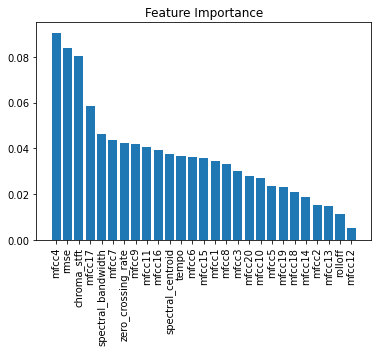

0.444

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()
dtc.score(X_test_scaled, y_test)

## 2. K-Nearest Neighbors


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.66

### Predicting the test results

In [ ]:
y_pred = knn.predict(X_test_scaled)
y_test_np = np.array(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_np.reshape(len(y_test), 1)), 1))

[[6 6]
 [4 7]
 [2 9]
 [1 1]
 [5 5]
 [3 7]
 [6 6]
 [3 7]
 [3 4]
 [4 4]
 [5 5]
 [3 4]
 [8 8]
 [2 5]
 [1 1]
 [7 4]
 [3 7]
 [8 8]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [6 6]
 [3 6]
 [8 8]
 [3 6]
 [0 0]
 [7 7]
 [2 8]
 [5 5]
 [5 5]
 [6 6]
 [5 9]
 [6 6]
 [4 8]
 [2 2]
 [3 6]
 [6 6]
 [7 7]
 [6 6]
 [2 7]
 [0 0]
 [4 8]
 [7 7]
 [2 2]
 [8 8]
 [2 5]
 [1 1]
 [9 9]
 [3 6]
 [3 3]
 [9 8]
 [7 7]
 [3 6]
 [4 4]
 [8 8]
 [1 1]
 [0 0]
 [2 5]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 0]
 [2 2]
 [1 1]
 [7 7]
 [9 3]
 [2 8]
 [1 1]
 [4 3]
 [0 0]
 [8 8]
 [8 8]
 [6 6]
 [3 3]
 [4 1]
 [0 0]
 [5 1]
 [3 7]
 [3 3]
 [2 2]
 [0 0]
 [1 2]
 [6 0]
 [4 3]
 [2 8]
 [5 5]
 [6 6]
 [9 9]
 [6 6]
 [7 7]
 [9 4]
 [8 8]
 [8 8]
 [1 1]
 [2 2]
 [5 0]
 [2 8]
 [7 8]
 [8 4]
 [5 5]
 [0 0]
 [9 3]
 [6 6]
 [2 9]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [3 2]
 [7 7]
 [4 4]
 [3 7]
 [0 5]
 [8 9]
 [9 9]
 [7 9]
 [2 4]
 [6 6]
 [2 4]
 [2 2]
 [6 6]
 [5 5]
 [2 2]
 [6 6]
 [7 7]
 [0 0]
 [7 7]
 [1 1]
 [1 1]
 [6 4]
 [5 5]
 [1 1]
 [6 4]
 [1 1]
 [2 9]
 [9 5]
 [5 5]
 [1 1]
 [2 5]
 [6 0]
 [3 3]

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23  0  3  0  0  2  2  0  0  0]
 [ 0 30  0  0  2  1  0  0  0  0]
 [ 0  1 19  1  0  1  0  0  1  0]
 [ 0  0  1 10  3  0  0  1  0  2]
 [ 3  0  2  5 10  0  2  1  2  1]
 [ 2  0  4  0  1 13  0  0  0  1]
 [ 1  0  0  7  0  0 19  0  0  0]
 [ 0  0  2  5  1  0  0 19  0  0]
 [ 0  0  6  1  4  0  0  3 15  1]
 [ 1  0  4  0  0  1  0  1  2  7]]


0.66

## 3. Support Vector Machine


In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.756

In [ ]:
clf = SVC(kernel = 'sigmoid', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.064

In [ ]:
clf = SVC(kernel = 'poly', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.696

In [ ]:
clf = SVC(kernel = 'linear', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.732

# **Collecting metadata from wav file**

In [ ]:
from Metadata import getmetadata

def predict(metadata, model):
  d1 = np.array(metadata)
  data1 = scaler.transform([d1])
  genre_prediction = model.predict(data1)
  # print(genre_prediction)
  return lookup_genre_name[genre_prediction[0]]

# Prediction from wav file 

First test (jazz)

In [ ]:
import IPython.display as ipd
ipd.Audio('jazz01.wav') 

In [ ]:
metadata1 = getmetadata("jazz01.wav")

# Using KNN
print('KNN : ', predict(metadata1, knn))

# Using SVM (linear kernel)
print('SVM : ', predict(metadata1, clf))
predict(metadata1, clf)

# Using decision tree
print('Decision Tree : ', predict(metadata1, dtc))

KNN :  country
SVM :  country
Decision Tree :  jazz


Second test (hiphop)

In [ ]:
import IPython.display as ipd
ipd.Audio('hiphop01.wav') 

In [ ]:
metadata1 = getmetadata("hiphop01.wav")

# Using KNN
print('KNN : ', predict(metadata1, knn))

# Using SVM (linear kernel)
print('SVM : ', predict(metadata1, clf))
predict(metadata1, clf)

# Using decision tree
print('Decision Tree : ', predict(metadata1, dtc))

KNN :  disco
SVM :  disco
Decision Tree :  hiphop


Third Test (classical)

In [ ]:
import IPython.display as ipd
ipd.Audio('classical01.wav') 

In [ ]:
metadata1 = getmetadata("classical01.wav")

# Using KNN
print('KNN : ', predict(metadata1, knn))

# Using SVM (linear kernel)
print('SVM : ', predict(metadata1, clf))
predict(metadata1, clf)

# Using decision tree
print('Decision Tree : ', predict(metadata1, dtc))

KNN :  classical
SVM :  classical
Decision Tree :  classical


Fourth test (country)

In [ ]:
import IPython.display as ipd
ipd.Audio('country01.wav')

In [ ]:
 metadata1 = getmetadata("country01.wav")

# Using KNN
print('KNN : ', predict(metadata1, knn))

# Using SVM (linear kernel)
print('SVM : ', predict(metadata1, clf))
predict(metadata1, clf)

# Using decision tree
print('Decision Tree : ', predict(metadata1, dtc))

KNN :  country
SVM :  country
Decision Tree :  country
